# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

План проведения исследования:
1. Изучить общую информацию 
2. Предобработка данных
3. Проведение исследовательского анализа данных
4. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод о проведенном исследовании

## Откройте файл с данными и изучите общую информацию

### Импорт библитек

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

### Чтение данных с файла

In [2]:
df = pd.read_csv('/datasets/games.csv')

### Вывод первых 10 строк датафрейма

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Изучение общей информации датафрейма

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод по ознакомлению с данными

1. Всего в таблице 16715 строк.
2. Из 11 столбцов в 6 есть пропущенные значения.
3. В названиях всех солбцов имеют нарушение стиля (названия столбцов начинаются с заглавной буквы).
4. Некоторые колонки имеют неверный тип данных.
5. В целом для проведения исследования данных достаточно.

## Предобработка данных

### Изменение названия столбцов

In [5]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Проверка датафрейма на явные дубликаты

In [6]:
df[df.duplicated()].count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Вывод:  
В датафрейме нет явных дубликатов

### Обработка пропусков

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

После проверки таблицы на наличие пропусков можно сделать следующий вывод:
1. В строке имени `name` 2 пропуска.
2. В строке года выпуска `year_of release` 269 пропусков.
3. В строке жанра `genre` 2 пропуска.
4. В стркое оценки критиков `critic_score` 8578 пропусков.
5. В строке оценки пользователей `user_score` 6701 пропусков.
6. В строке возрастной категории `rating` 6766 пропусков.

#### Обработка столбца `name` и `genre`

In [8]:
df['name'].isna().sum()/len(df)*100

0.011965300628178284

In [9]:
df['genre'].isna().sum()/len(df)*100

0.011965300628178284

Так как в обоих столбцах число пропущенных значений составляет менее 1% было принято решение удалить строки с пустыми значениями в этих столбцах, потому что это не повлияет на общий результат исследования.

In [10]:
df = df.dropna(subset=['name', 'genre'])
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### Обработка столбца `year_of_release`

In [11]:
df['year_of_release'].isna().sum()/len(df)*100

1.6095255190570215

Так как в столбце число пропущенных значений составляет меньше 2% было принято решение удалить строки с пустыми значениями в этих столбцах, потому что это не повлияет на общий результат исследования.

In [12]:
df = df.dropna(subset=['year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

#### Обработка столбца `critic_score`

In [13]:
df['critic_score'].isna().sum()/len(df)*100

51.453417659936754

Пропущено больше 50% значений, поэтому удалять или заменять значения на медиальные нет смысла. Все пустые значения заменим на "0"

In [14]:
df['critic_score'] = df['critic_score'].fillna(0)

#### Обработка столбца `user_score`

In [15]:
df['user_score'].isna().sum()/len(df)*100

40.166626125030405

Пропущено больше 40% значений, поэтому удалять или заменять значения на медиальные нет смысла. Все пустые значения заменим на "0"

In [16]:
df['user_score'] = df['user_score'].fillna(0)
df['user_score'].value_counts()

0      6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.3       2
9.6       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

In [17]:
df[df['user_score']=='tbd']['user_score'].count().sum()/len(df)*100

14.449039163220629

В столбце есть не числовая оценка `tbd`, при этом она имеет 14% данных. Чтобы эта оценка не влияла на данные исследования необходимо её так же обозначит как "0"

In [18]:
df.loc[df['user_score']=='tbd', 'user_score'] = 0
df['user_score'].value_counts()

0      8981
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.5       2
0.5       2
0.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

#### Обработка столбца `rating`

In [19]:
df['rating'].isna().sum()/len(df)*100

40.59839455120409

Пропущено больше 40% значений, поэтому удалять или заменять значения на средние или медиальные нет смысла. Все пустые значения заменим на неизвестную возрастную категорию "unknown"

In [20]:
df['rating'] = df['rating'].fillna('unknown')

In [21]:
df['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

In [22]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Вывод
По итогу обработки пропусков можно сделать следующие выводы:
1. Значние с толбцах `name` и `genre` были удалены из-за того что число пропусков слишком мало и никак не повлияют на исследование. Скорее всего это связано с невнимательностью или технической ошибкой при заполнении.
2. В столбцах `year_of relese`, `critic_score` и `user_score` пропуски были заменены нулями, потому что пустые значения в этих столбцах занимали от 40 до 50 процентов данных и их удаление или изменение на средние или медиальные значения слишком сильно повлияет на результаты исследования. В столбце года выхода игры скорее всего пропуски из-за того, что нет данных о точно дате выхода игры. В столбцах с оценкой пользователей и критиков нет значений скорее всего из-за того что пользователи или критики не поставили достаточное окличество оценок играм.
3. В столбце `rating` все пропуски были изменены на 'unknown', потому что количество пропусков в этом столбце очень велико (40%) из-за чего их удаление или замена на средние или медиальные значения слишком сильно повлияет на результаты исследования. Скорее всего пропуски связаны с тем, что у многих игр нет возрастного ограничения или оно не указано издателем.

### Преобразование типов данных столбцов

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### `year_of_release`

In [24]:
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

Необходимо изменить тип данных на int потому что в значениях года нет дробной части

In [25]:
df['year_of_release'] = df['year_of_release'].astype(int)

#### `critic_score`

In [26]:
df['critic_score'].sort_values()

8354      0.0
10308     0.0
10309     0.0
10310     0.0
10311     0.0
         ... 
1877     97.0
227      98.0
51       98.0
5350     98.0
57       98.0
Name: critic_score, Length: 16444, dtype: float64

Необходимо изменить тип данных на int потому что в значениях оценки критиков нет дробной части

In [27]:
df['critic_score'] = df['critic_score'].astype(int)

#### `user_score`

Необходимо изменить тип данных на float потому что в значениях оценки пользователей только числовые значения с дробной частью (значения оценки пользователей расичтвается от 0 до 10 и может быть дробны, в отличии от оценки критиков)

In [28]:
df['user_score'] = df['user_score'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [30]:
df['total_sales'] = df.loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,unknown,28.31


### Общий вывод по предобработке данных

По итогу предобработки данных можно сделать следующие выводы:
   1. Был изменен формат названия столбцов на строчный.
   2. Явных дубликатов не было обнаружено.
   3. По итогу обработки пропусков можно сделать следующие выводы:
        * Значние с толбцах `name` и `genre` были удалены из-за того что число пропусков слишком мало и никак не повлияют на исследование. Скорее всего это связано с невнимательностью или технической ошибкой при заполнении.
        * В столбцах `year_of relese`, `critic_score` и `user_score` пропуски были заменены нулями, потому что пустые значения в этих столбцах занимали от 40 до 50 процентов данных и их удаление или изменение на средние или медиальные значения слишком сильно повлияет на результаты исследования. В столбце года выхода игры скорее всего пропуски из-за того, что нет данных о точно дате выхода игры. В столбцах с оценкой пользователей и критиков нет значений скорее всего из-за того что пользователи или критики не поставили достаточное окличество оценок играм.
        * В столбце `rating` все пропуски были изменены на 'unknown', потому что количество пропусков в этом столбце очень велико (40%) из-за чего их удаление или замена на средние или медиальные значения слишком сильно повлияет на результаты исследования. Скорее всего пропуски связаны с тем, что у многих игр нет возрастного ограничения или оно не указано издателем. 
        * Также помимо выше указанных причин появляения пропусков возможны ошибки при сборе даных с разных источников.
   4. Были изменены типы данных в толбцах `year_of release`, `critic_score` и `user_Score` на более подходящие.
   5. Посчитаны суммарные продажи по всем регионам и занесены с отдельный столбец

## Проведите исследовательский анализ данных

### Исследование количества продаж игр по годам

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

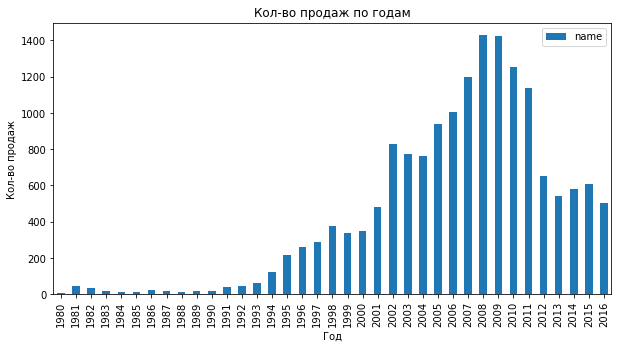

In [31]:
(
df.
    query('year_of_release > 0').
    pivot_table(index='year_of_release', values='name', aggfunc='count').
    plot(kind='bar', xlabel='Год', ylabel='Кол-во продаж', title='Кол-во продаж по годам', figsize=(10,5))
)


df[df['year_of_release'] > 0]['year_of_release'].describe()

#### Вывод по выпуску игр по годам:
1. Рост продаж наблюдается в период от 1994 года по 2008 с просадкой в 2003-2004 годах, после 2011 количество продаж падает.
2. Самое большое количество продаж наблюдается в 2008-2009 годах.
3. В исследовании следует выбирать игры не старше 11 лет, потому что новые игры влияют на рынок гораздо сильнее, чем старые (исходя из количества продаж).

### Исследование продаж по платформам

<AxesSubplot:title={'center':'Суммарные продажи по платформам'}, xlabel='Платформа', ylabel='Суммарные продажи'>

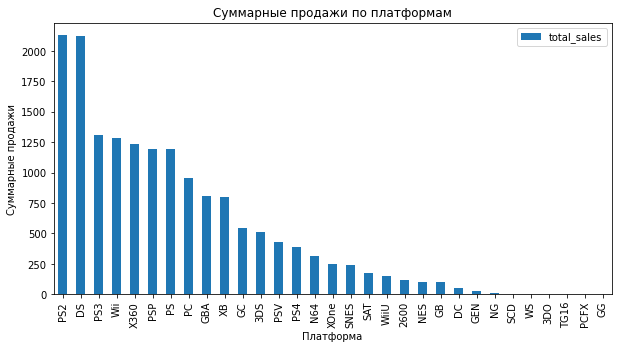

In [32]:
(
df.
    pivot_table(index='platform', values='total_sales', aggfunc='count').
    sort_values(by='total_sales', ascending=False).
    plot(kind='bar', xlabel='Платформа', ylabel='Суммарные продажи', title='Суммарные продажи по платформам', figsize=(10,5))
)

У первых 8 платформ наибольшее суммарное количество продаж. Построим распределение по годам для каждой из этих платформ. 

#### PS2

<AxesSubplot:title={'center':'Жизненный цикл PS2 с максимальными продажами'}, xlabel='Год выпска', ylabel='Суммарные продажи'>

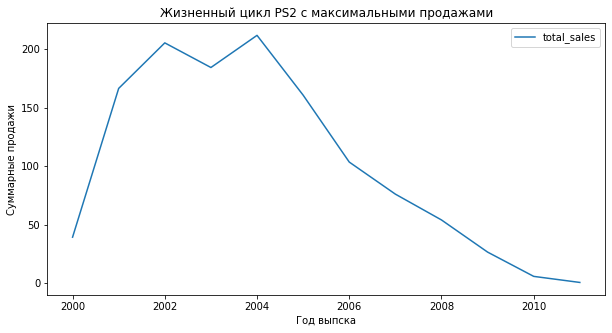

In [33]:
(
    df.
    query('platform=="PS2" and year_of_release>0').
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
    sort_values(by='year_of_release', ascending=True).
    plot(xlabel='Год выпска', 
         ylabel='Суммарные продажи', 
         title='Жизненный цикл PS2 с максимальными продажами', figsize=(10,5))
)

#### DS

<AxesSubplot:title={'center':'Жизненный цикл DS с максимальными продажами'}, xlabel='Год выпска', ylabel='Суммарные продажи'>

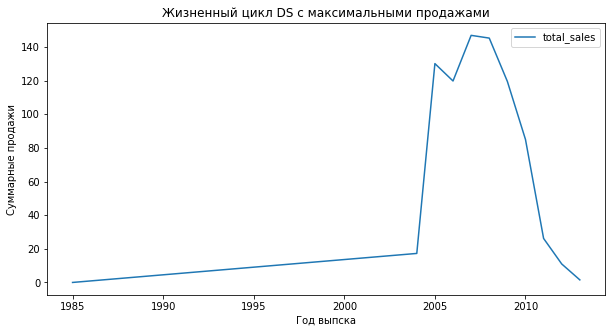

In [34]:
(
    df.
    query('platform=="DS" and year_of_release>0').
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
    sort_values(by='year_of_release', ascending=True).
    plot(xlabel='Год выпска', 
         ylabel='Суммарные продажи', 
         title='Жизненный цикл DS с максимальными продажами', figsize=(10,5))
)

У DS есть какая-то аномалия из-за которой у него появилось значение в 1985 году. Необходимо проверить что это.

In [35]:
df.query('platform=="DS" and year_of_release<2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0,0.0,unknown,0.02


В данных только 1 запись, которая не имеет нигде продаж, кроме небольшого количества в японии. Было принято решение удалить данную строку по индексу, потому что скорее всего это какая-то ошибка при заполнении и построить грфик снова

<AxesSubplot:title={'center':'Жизненный цикл DS с максимальными продажами'}, xlabel='Год выпска', ylabel='Суммарные продажи'>

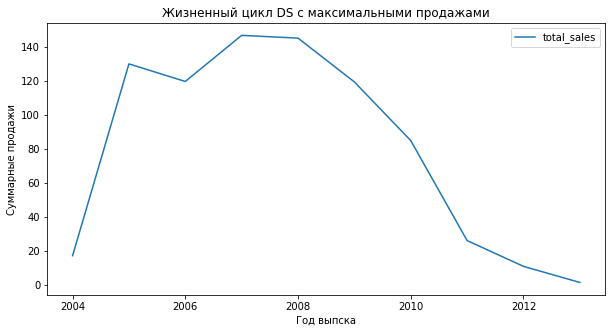

In [36]:
df = df.drop(index=15957)
(
    df.
    query('platform=="DS" and year_of_release>0').
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
    sort_values(by='year_of_release', ascending=True).
    plot(xlabel='Год выпска', 
         ylabel='Суммарные продажи', 
         title='Жизненный цикл DS с максимальными продажами', figsize=(10,5))
)

#### PS3

<AxesSubplot:title={'center':'Жизненный цикл PS3 с максимальными продажами'}, xlabel='Год выпска', ylabel='Суммарные продажи'>

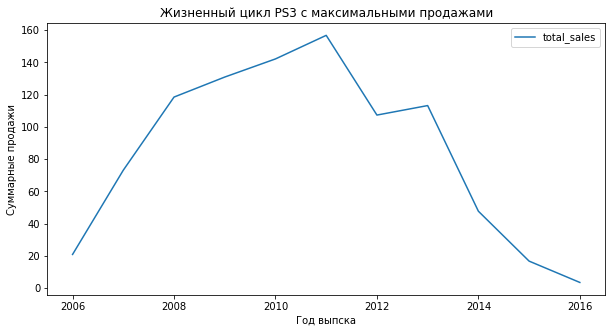

In [37]:
(
    df.
    query('platform=="PS3" and year_of_release>0').
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
    sort_values(by='year_of_release', ascending=True).
    plot(xlabel='Год выпска', 
         ylabel='Суммарные продажи', 
         title='Жизненный цикл PS3 с максимальными продажами', figsize=(10,5))
)

#### Wii

<AxesSubplot:title={'center':'Жизненный цикл Wii с максимальными продажами'}, xlabel='Год выпска', ylabel='Суммарные продажи'>

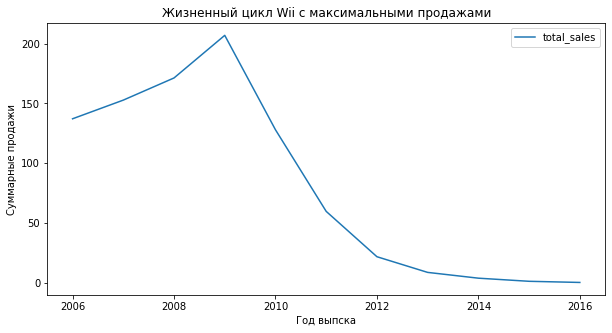

In [38]:
(
    df.
    query('platform=="Wii" and year_of_release>0').
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
    sort_values(by='year_of_release', ascending=True).
    plot(xlabel='Год выпска', 
         ylabel='Суммарные продажи', 
         title='Жизненный цикл Wii с максимальными продажами', figsize=(10,5))
)

#### X360

<AxesSubplot:title={'center':'Жизненный цикл X360 с максимальными продажами'}, xlabel='Год выпска', ylabel='Суммарные продажи'>

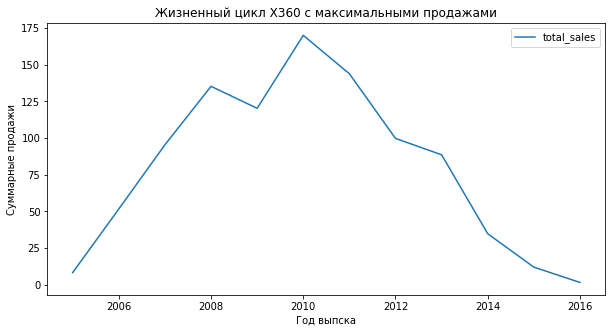

In [39]:
(
    df.
    query('platform=="X360" and year_of_release>0').
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
    sort_values(by='year_of_release', ascending=True).
    plot(xlabel='Год выпска', 
         ylabel='Суммарные продажи', 
         title='Жизненный цикл X360 с максимальными продажами', figsize=(10,5))
)

#### PSP

<AxesSubplot:title={'center':'Жизненный цик PSP с максимальными продажами'}, xlabel='Год выпска', ylabel='Суммарные продажи'>

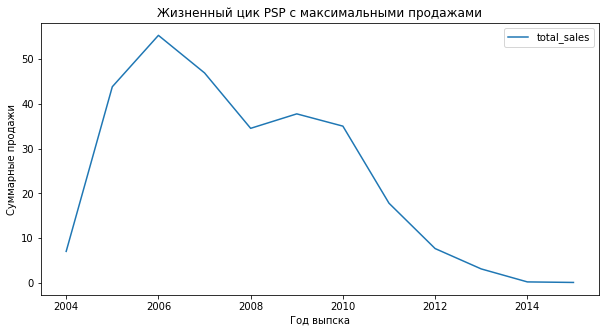

In [40]:
(
    df.
    query('platform=="PSP" and year_of_release>0').
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
    sort_values(by='year_of_release', ascending=True).
    plot(xlabel='Год выпска', 
         ylabel='Суммарные продажи', 
         title='Жизненный цик PSP с максимальными продажами', figsize=(10,5))
)

#### PS

<AxesSubplot:title={'center':'Жизненный цикл PS с максимальными продажами'}, xlabel='Год выпска', ylabel='Суммарные продажи'>

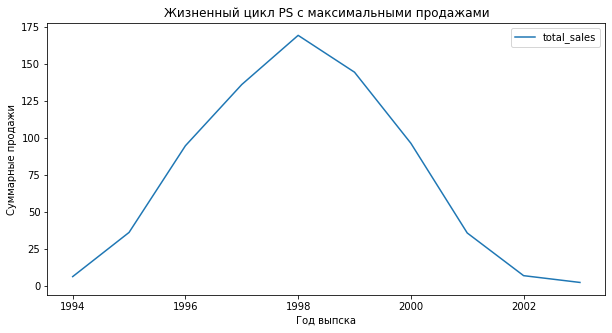

In [41]:
(
    df.
    query('platform=="PS" and year_of_release>0').
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
    sort_values(by='year_of_release', ascending=True).
    plot(xlabel='Год выпска', 
         ylabel='Суммарные продажи', 
         title='Жизненный цикл PS с максимальными продажами', figsize=(10,5))
)

#### PC

<AxesSubplot:title={'center':'Жизненный цикл PC с максимальными продажами'}, xlabel='Год выпска', ylabel='Суммарные продажи'>

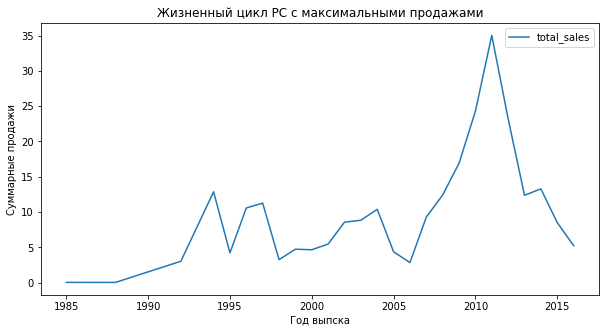

In [42]:
(
    df.
    query('platform=="PC" and year_of_release>0').
    pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').
    sort_values(by='year_of_release', ascending=True).
    plot(xlabel='Год выпска', 
         ylabel='Суммарные продажи', 
         title='Жизненный цикл PC с максимальными продажами', figsize=(10,5))
)

Расчитаем за какой срок в среднем появляются новые и пропадают старые платформы

In [43]:
time_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).iloc[0:7, :].reset_index()
time_life['life'] = time_life['max'] - time_life['min'] 
'Среднее значение жизненного цикла по всей выборке', time_life['life'].median(), 'лет'

('Среднее значение жизненного цикла по всей выборке', 9.0, 'лет')

В исследовании больше интересует рост продаж платформы, который как правило приходится на первую половину жизненного цикла консоли. Поэтому возьмем только первую половину среднего цикла жизни платформы с округлением вверх.

In [44]:
t = np.ceil(time_life['life'].mean()/2)
'Актуальный период жизненного цикла платформы -', t, 'года'

('Актуальный период жизненного цикла платформы -', 4.0, 'года')

#### Вывод по исследованию платформ

В среднем платформы актуальны 10 лет, следовательно нам интересны платформы которые были выпущены не больше 4 лет назад.

### Исследование перспективных актуальных платформ

Создадим новую таблицу с актуальными платформами

In [45]:
actual_platforms = df.query('year_of_release >= 2016-@t').copy().reset_index(drop= True)
actual_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


Выведем список всех актуальных платформ

In [46]:
platforms = (actual_platforms
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(9)['platform'].tolist()
    )                       
platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii']

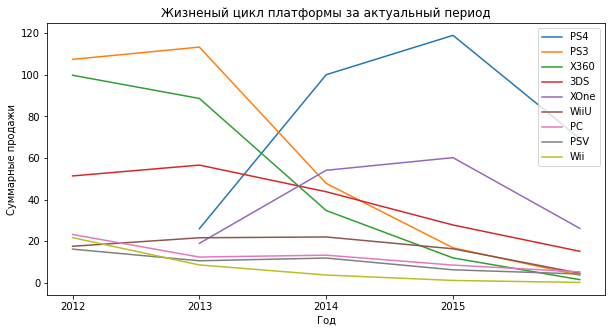

In [47]:
for platform in platforms:
    (
    actual_platforms.query('platform == @platform').
    pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').
    sort_values('year_of_release', ascending = False)['total_sales'].
    plot(kind='line', xlabel='Год', ylabel='Суммарные продажи', title='Жизненый цикл платформы за актуальный период',
          figsize = (10, 5), label=platform, legend=True)
    )
    plt.xticks(np.arange(2012, 2016))

По графику видно что продажи в 2016 году падают у всех платформ. Больше всего продаж у платформ PS4 и XOne.

### Постройте график «ящик с усами» (boxplot) по глобальным продажам игр в разбивке по платформам. Опишите результат.

Text(0, 0.5, 'Продажи по платформам')

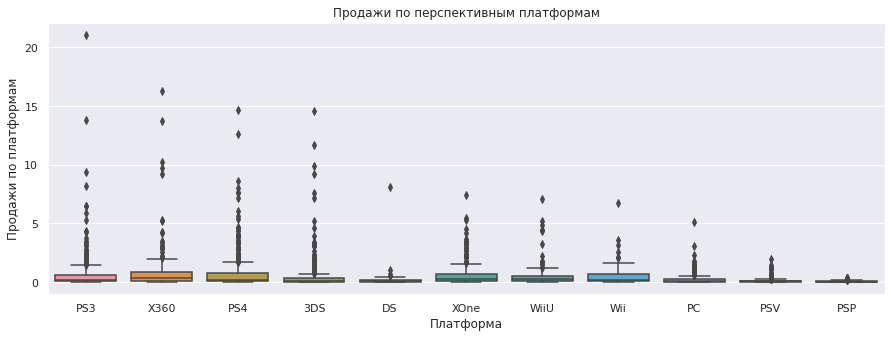

In [48]:
sns.set(rc = {'figure.figsize':(15, 5)})
sns.boxplot(data=actual_platforms, x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')

В таблице видно что есть очень много выбросов, поэтому чтобы увидеть нужные нам значения необходимо отобразить график без выбросов.

In [49]:
actual_platforms['total_sales'].describe()

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Продажи по платформам')

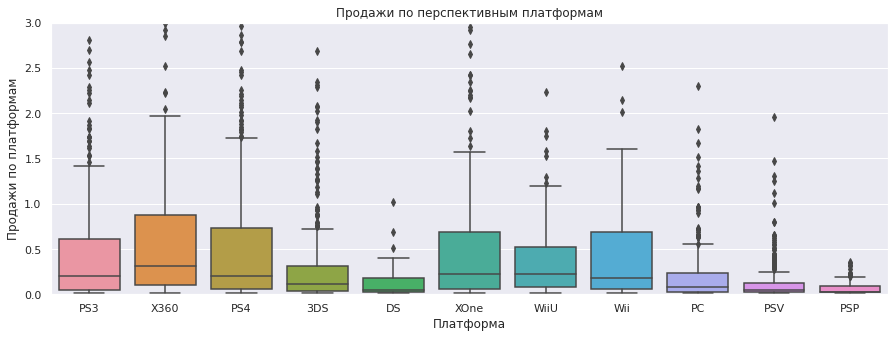

In [50]:
sns.set(rc = {'figure.figsize':(15, 5)})
ax=sns.boxplot(data=actual_platforms, x='platform', y='total_sales')
ax.set(ylim=(0,3))
plt.title('Продажи по перспективным платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')

#### Вывод по построению графика boxplot:
1. У всех платформ большое количество выбросов по продажам. Также в первом и третьем квантилях заментен достаточно большой разброс данных.
2. Медиальное значение общего количества продаж по платформам - 0.12 млн. Среднее же значение - 0.50 млн. 
3. Больше всего продаж производится на плфтформе PS3, меньше всего - PSP.
4. Потенциально прибыльнимы платформами можно назвать с уверенностью XOne и PS4, потому что они являются самыми новыми из всех представленных в этой таблице платформ. Также нельзя отрицать, что платформа PC будет достаточно прибыльной, потому что продажи на этой платформе наиболее стабильные и компьютер есть почти у каждого, чего нельзя сказать о приставках и портативных приставках.
5. Наименее прибыльными платформами можно считать X360 и PS3, потому что это платформы предыдущего поколения и продажи по ним падают сильнее всего.

### Исследование влияния отзывов на продажи

#### Проверим влияние отдельно отзывов пользователей на количество продаж

<AxesSubplot:title={'center':'Диаграмма распределения между оценками пользователей и количеством продаж'}, xlabel='Оценка пользователей', ylabel='Продажи'>

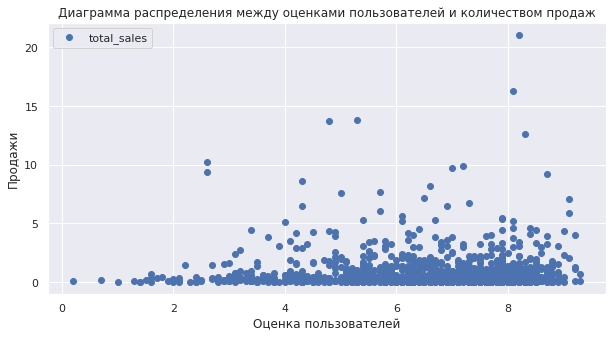

In [51]:
(
actual_platforms.
     query('user_score > 0').
     plot(x='user_score', 
          y='total_sales', 
          style='o', 
          figsize=(10, 5), 
          title='Диаграмма распределения между оценками пользователей и количеством продаж', 
          xlabel='Оценка пользователей',
          ylabel='Продажи') 
)

#### Проверим влияние отдельно отзывов критиков на количество продаж

<AxesSubplot:title={'center':'Диаграмма распределения между оценками критиков и количеством продаж'}, xlabel='Оценка пользователей', ylabel='Продажи'>

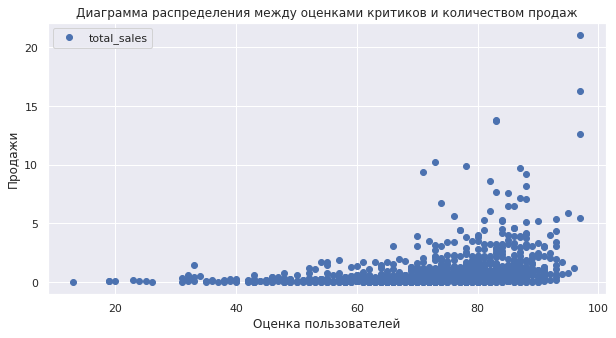

In [52]:
(
actual_platforms.
     query('critic_score > 0').
     plot(x='critic_score', 
          y='total_sales', 
          style='o', 
          figsize=(10, 5), 
          title='Диаграмма распределения между оценками критиков и количеством продаж', 
          xlabel='Оценка пользователей',
          ylabel='Продажи') 
)

#### Проверим корреляцию отзывов пользователей и критиков от количества продаж

In [53]:
'Общая корреляция между оценками пользователей и продажами = ', actual_platforms.query('user_score > 0')['user_score'].corr(actual_platforms['total_sales'])

('Общая корреляция между оценками пользователей и продажами = ',
 0.0044288176754932575)

Диагрммы распределения и корреляция явно указывают на слабую зависимость между отзывами пользователей и количеством продаж игр на платформах.

In [54]:
'Общая корреляция между оценками критиков и продажами = ', actual_platforms.query('critic_score > 0')['critic_score'].corr(actual_platforms['total_sales'])

('Общая корреляция между оценками критиков и продажами = ', 0.3081967459207781)

Диагрммы распределения и корреляция явно указывают на среднюю зависимость между отзывами критиков и количеством продаж игр на платформах.

#### Проделаем такую же процедуру (проверим влияние отзывов пользователей и критиков на продажи платформ), но для каждой платформы отдельно

##### Диаграма расрпеделения между отзывами пользователей и количеством продаж на отдельных платформах

Корреляция между оценками пользователей и количеством продаж платформы PS4  = -0.031957110204556376
Корреляция между оценками пользователей и количеством продаж платформы PS3  = -0.005143522887113828
Корреляция между оценками пользователей и количеством продаж платформы X360  = 0.006163978646213326
Корреляция между оценками пользователей и количеством продаж платформы 3DS  = 0.19758263411038599
Корреляция между оценками пользователей и количеством продаж платформы XOne  = -0.06892505328279414
Корреляция между оценками пользователей и количеством продаж платформы WiiU  = 0.4002190202148617
Корреляция между оценками пользователей и количеством продаж платформы PC  = -0.12186747630735577
Корреляция между оценками пользователей и количеством продаж платформы PSV  = -0.004339437514314869
Корреляция между оценками пользователей и количеством продаж платформы Wii  = 0.29619680007479526


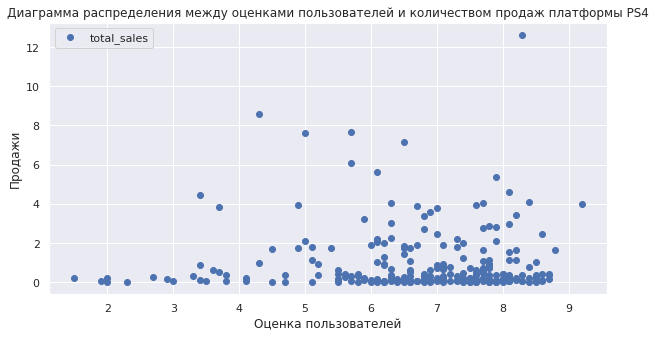

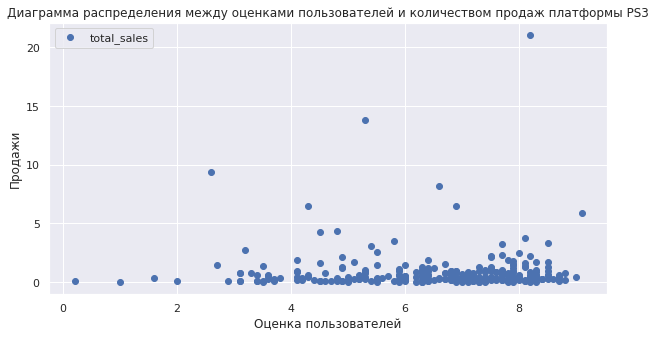

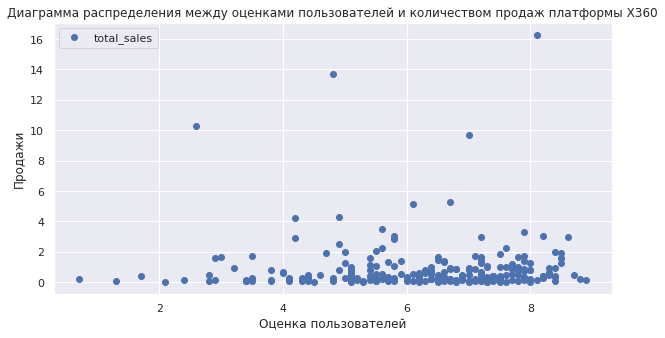

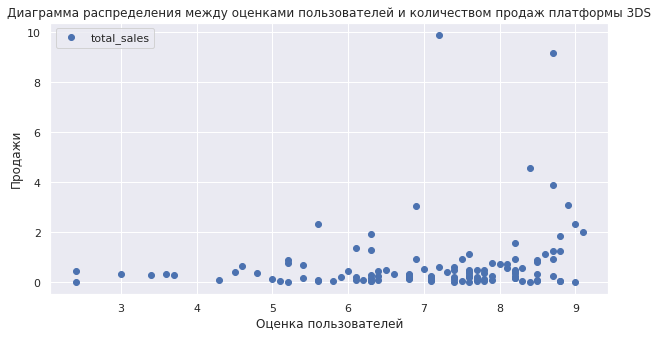

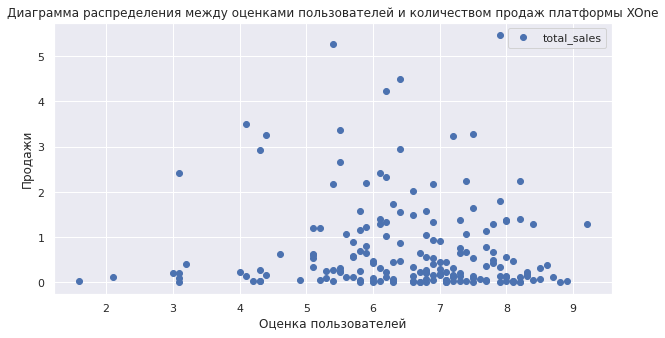

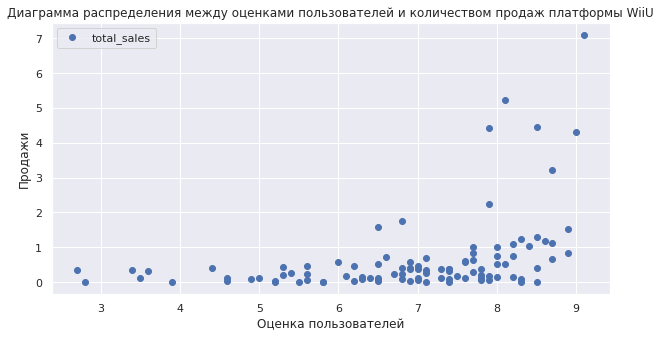

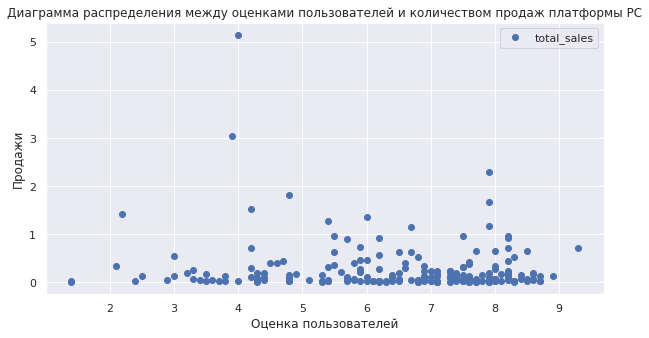

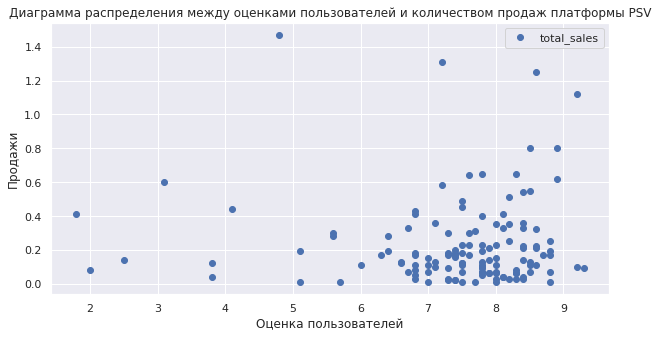

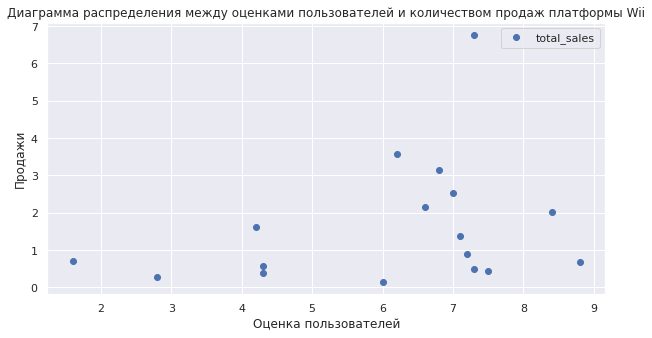

In [55]:
for platform in platforms:
    (actual_platforms.
     query('platform == @platform and user_score > 0').
     plot(x='user_score', 
          y='total_sales', 
          style='o', 
          figsize=(10, 5), 
          title=f'Диаграмма распределения между оценками пользователей и количеством продаж платформы {platform}', 
          xlabel='Оценка пользователей',
          ylabel='Продажи') 
    )
    print(f'Корреляция между оценками пользователей и количеством продаж платформы {platform}  =', actual_platforms.query('platform == @platform and user_score > 0')['user_score'].corr(actual_platforms.query('platform == @platform and user_score > 0')['total_sales']))

Диагрммы распределения явно указывают на слабую зависимость между отзывами пользователей и количеством продаж игр на платформах.

##### Диаграма расрпеделения между отзывами критиков и количеством продаж на отдельных платформах

Корреляция между оценками критиков и количеством продаж платформы PS4  = 0.40656790206178095
Корреляция между оценками критиков и количеством продаж платформы PS3  = 0.3314972592629587
Корреляция между оценками критиков и количеством продаж платформы X360  = 0.3605734888507336
Корреляция между оценками критиков и количеством продаж платформы 3DS  = 0.3208028695360785
Корреляция между оценками критиков и количеством продаж платформы XOne  = 0.4169983280084017
Корреляция между оценками критиков и количеством продаж платформы WiiU  = 0.34837976012017485
Корреляция между оценками критиков и количеством продаж платформы PC  = 0.23724324311567915
Корреляция между оценками критиков и количеством продаж платформы PSV  = 0.0944878992931617
Корреляция между оценками критиков и количеством продаж платформы Wii  = -0.4243413011077494


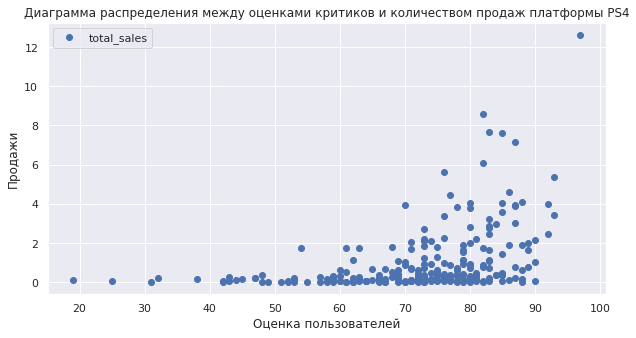

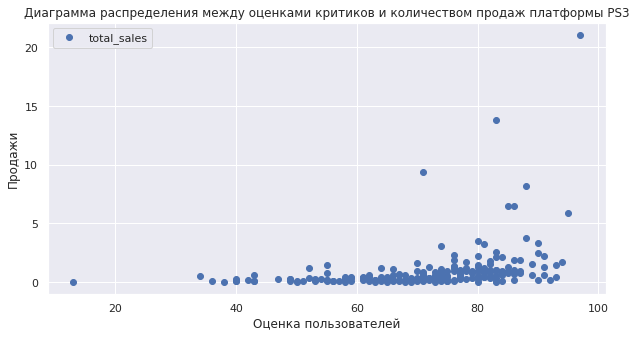

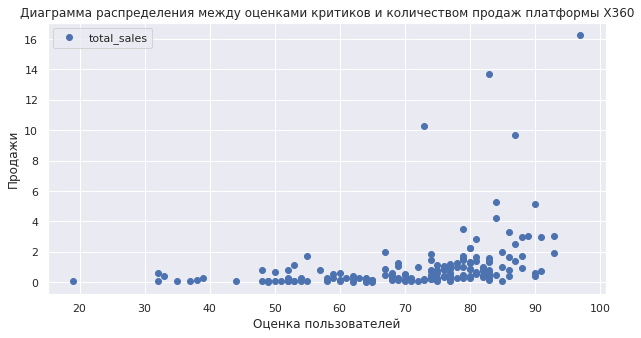

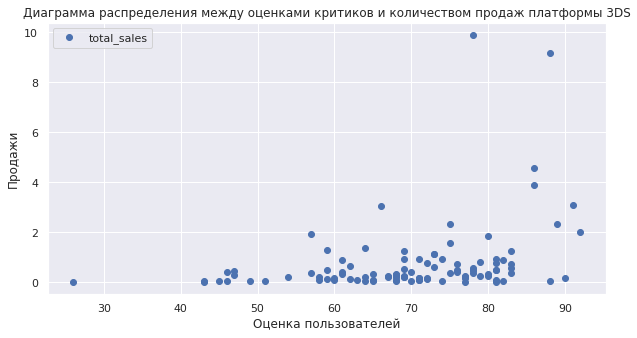

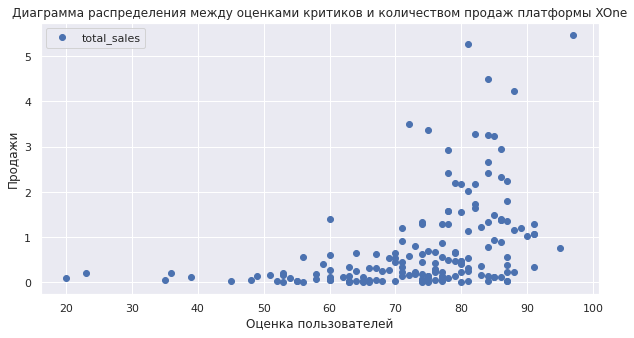

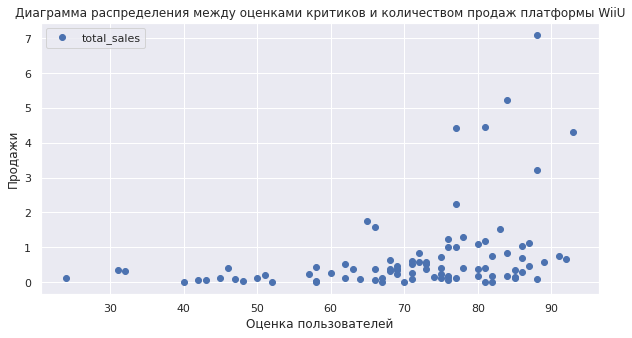

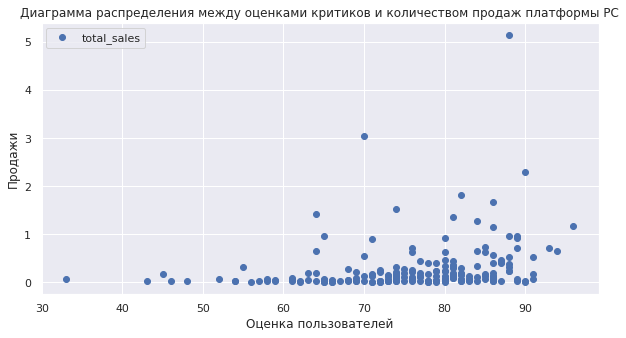

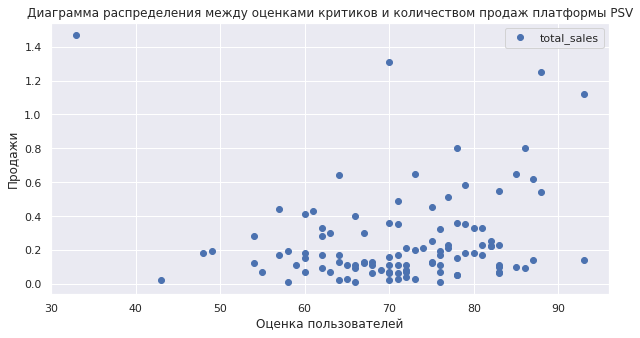

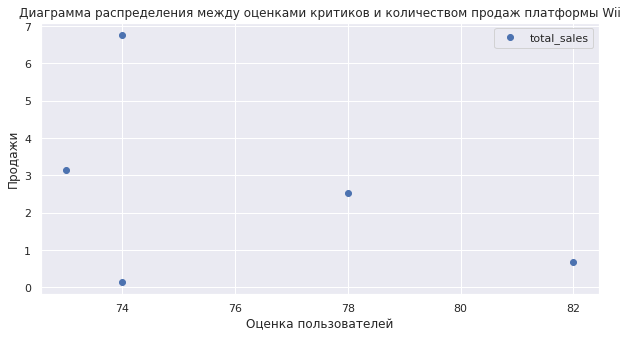

In [56]:
for platform in platforms:
    (actual_platforms.
     query('platform == @platform and critic_score > 0').
     plot(x='critic_score', 
          y='total_sales', 
          style='o', 
          figsize=(10, 5), 
          title=f'Диаграмма распределения между оценками критиков и количеством продаж платформы {platform}', 
          xlabel='Оценка пользователей',
          ylabel='Продажи') 
    )
    print(f'Корреляция между оценками критиков и количеством продаж платформы {platform}  =', actual_platforms.query('platform == @platform and critic_score > 0')['critic_score'].corr(actual_platforms.query('platform == @platform and critic_score > 0')['total_sales']))

Диагрммы распределения явно указывают на среднюю зависимость между отзывами критиков и количеством продаж игр на платформах.

#### Вывод по исследованию зависимости оценок от продаж:
Диаграммы зависимостей отзывов пользователей и критиков на общее количество продаж и их корреляция показывает следующее:
1. Зависимость между оценками пользователей и продажами слабая.
2. Зависимость между оценками критиков и продажами средняя.
Диаграммы и корреляция по отдельным платформам дает такие же результаты.

### Исследование расрпеделения игр по жанрам

#### Построим график общей прибыли всех жанров

<AxesSubplot:title={'center':'Популярность игр по жанрам'}, ylabel='Жанр игр'>

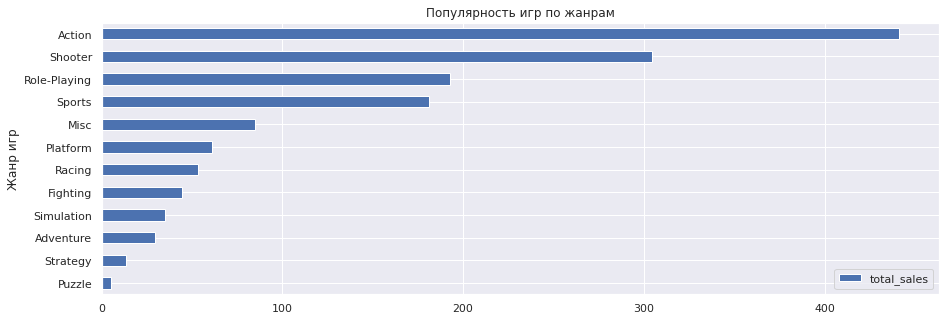

In [57]:
(
    actual_platforms.
    pivot_table(index='genre', values='total_sales', aggfunc='sum').
    sort_values(by='total_sales', ascending=True).
    plot(kind='barh', title='Популярность игр по жанрам', xlabel='Жанр игр')
)

#### Построим график медиальной прибыли всех жанров

<AxesSubplot:title={'center':'Популярность игр по жанрам'}, ylabel='Жанр игр'>

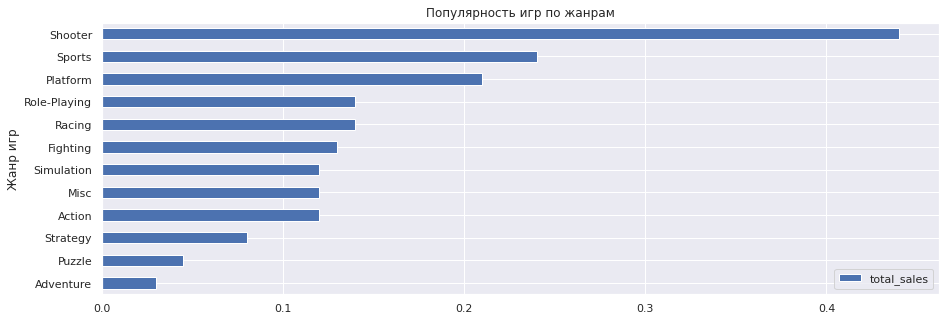

In [58]:
(
    actual_platforms.
    pivot_table(index='genre', values='total_sales', aggfunc='median').
    sort_values(by='total_sales', ascending=True).
    plot(kind='barh', title='Популярность игр по жанрам', xlabel='Жанр игр')
)

Исходя из даных полученных в графике можно сделать следующие выводы:
1. Самый популярный жанр среди всех игр и имеющий максимальную прибыль за последние 4 года - `Action` и `Shooter`, в то время как самый непопулярный - `Puzzle`.
2. Если смотреть медиальную прибыль среди всех игр самые перспективные можно считать `Shooter` и `Sport`. Самый же менее перспективный жанр - `Adventure`.

### Общий вывод по исследовательскому анализу

По итогу проведения исследовательского анализа можно выделить следующие моменты:  
1. Рост продаж наблюдается в период от 1994 года по 2008 с просадкой в 2003-2004 годах, после 2011 количество продаж падает.  
2. Самое большое количество продаж наблюдается в 2008-2009 годах.  
3. В среднем платформы актуальны 10 лет, следовательно нам интересны платформы которые были выпущены не больше 4 лет назад.
4. По итогу исследования перспективности платформ нельзя сказать что-то наверняка, потому что на всех платформах наблюдается снижение продаж.  
5. Самое большое количество продаж у платформы PS3, самое же низкое у PSP.  
6. Потенциально прибыльнимы платформами можно назвать с уверенностью XOne и PS4, потому что они являются самыми новыми из всех представленных в этой таблице платформ. Также нельзя отрицать, что платформа PC будет достаточно прибыльной, потому что продажи на этой платформе наиболее стабильные и компьютер есть почти у каждого, чего нельзя сказать о приставках и портативных приставках.  
7. Наименее прибыльными платформами можно считать X360 и PS3, потому что это платформы предыдущего поколения и продажи по ним падают сильнее всего.  
8. Диагрммы распределения и корреляция явно указывают на слабую зависимость между отзывами пользователей и количеством продаж игр на платформах, как для всех платформ, так и для отдельно взятых.  
9. Диагрммы распределения и корреляция явно указывают на среднюю зависимость между отзывами критиков и количеством продаж игр на платформах, как для всех платформ, так и для отдельно взятых.  
10. Самый популярный жанр среди всех игр и имеющий максимальную прибыль за последние 4 года - `Action` и `Shooter`, в то время как самый непопулярный - `Puzzle`.  
11. Если смотреть медиальную прибыль среди всех игр самые перспективные можно считать `Shooter` и `Sport`. Самый же менее перспективный жанр - `Adventure`.

## Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5) по регионам

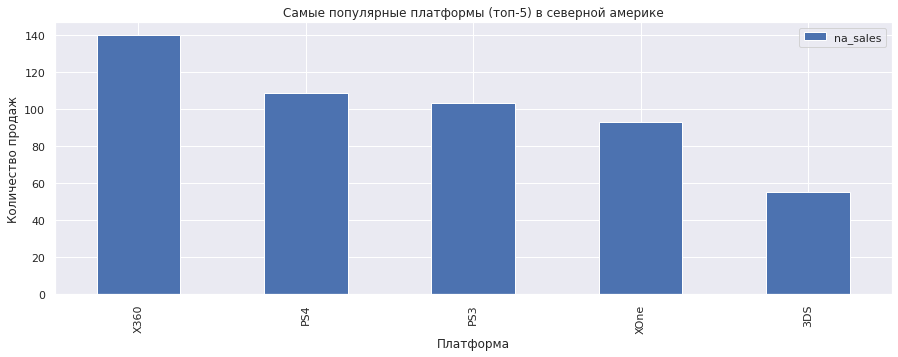

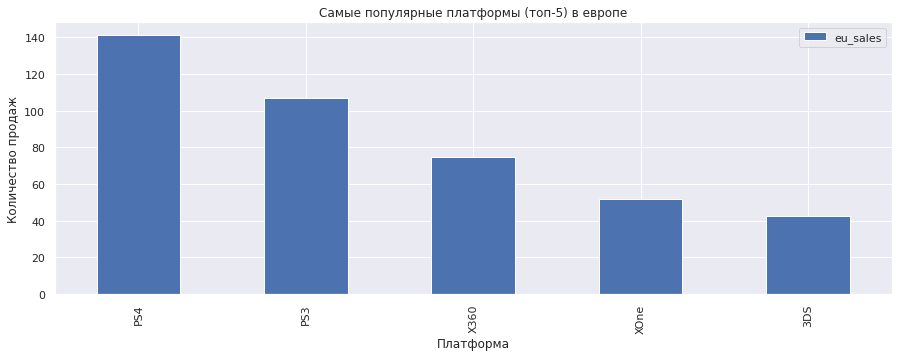

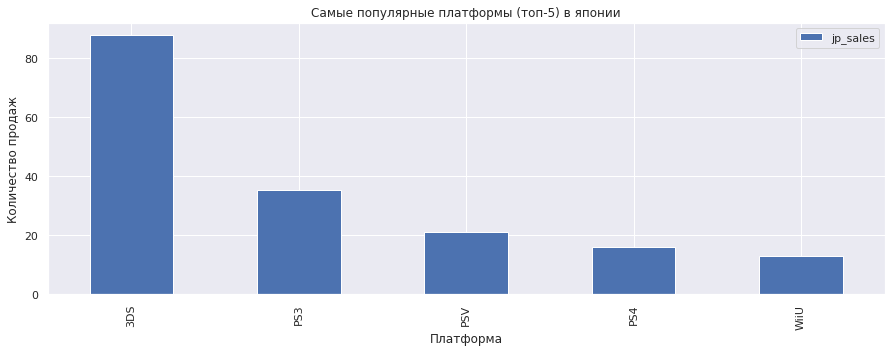

In [59]:
na_popular_platforms = (actual_platforms.
      pivot_table(index='platform', values='na_sales', aggfunc='sum').
      sort_values(by='na_sales', ascending=False)
      
     )

eu_popular_platforms = (actual_platforms.
      pivot_table(index='platform', values='eu_sales', aggfunc='sum').
      sort_values(by='eu_sales', ascending=False)
     )

jp_popular_platforms = (actual_platforms.
      pivot_table(index='platform', values='jp_sales', aggfunc='sum').
      sort_values(by='jp_sales', ascending=False)
     )



na_popular_platforms = na_popular_platforms.iloc[0:5, :].plot(kind='bar', 
           title='Самые популярные платформы (топ-5) в северной америке', 
           xlabel='Платформа', 
           ylabel='Количество продаж')

eu_popular_platforms = eu_popular_platforms.iloc[0:5, :].plot(kind='bar', 
           title='Самые популярные платформы (топ-5) в европе', 
           xlabel='Платформа', 
           ylabel='Количество продаж')

jp_popular_platforms = jp_popular_platforms.iloc[0:5, :].plot(kind='bar', 
           title='Самые популярные платформы (топ-5) в японии', 
           xlabel='Платформа', 
           ylabel='Количество продаж')



#### Вывод по популярным платформам по регионам
1. Самая популярная платформа в америке - X360, в европе - PS4, в японии - 3DS.
2. Список самых популяртных платформ в америке и европе совпадают, в то время как в японии популярными считаются другие платформы. Возможно это связно с тем, что в стране есть большое количество своих региональныъ платформ и пользователи отдают предпочтение им.

### Самые популярные жанры (топ-5) в разных регионах.

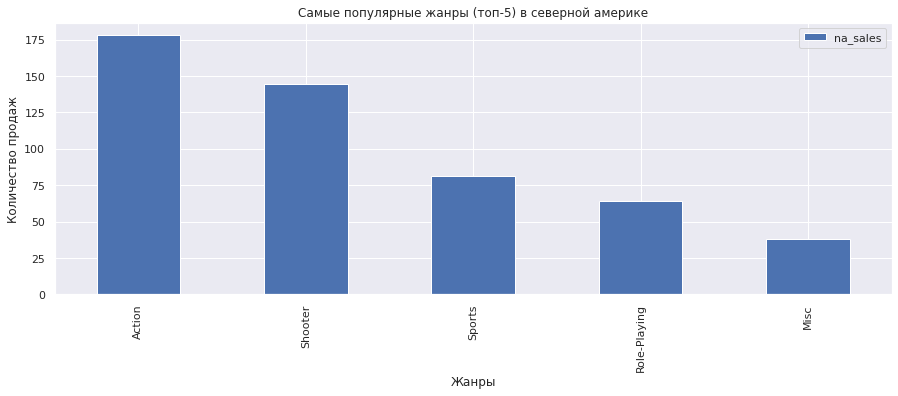

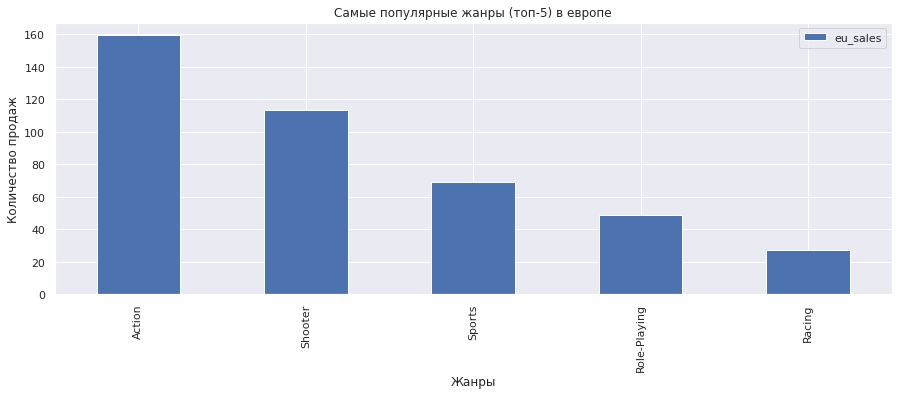

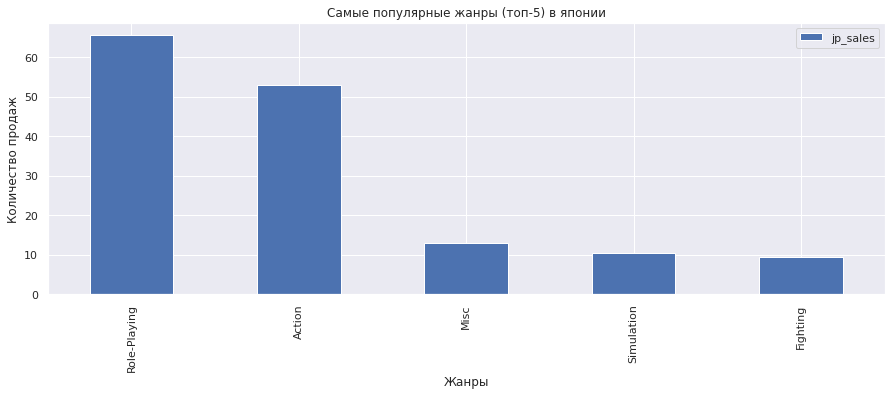

In [60]:
na_popular_genre = (actual_platforms.
      pivot_table(index='genre', values='na_sales', aggfunc='sum').
      sort_values(by='na_sales', ascending=False)
     )

eu_popular_genre = (actual_platforms.
      pivot_table(index='genre', values='eu_sales', aggfunc='sum').
      sort_values(by='eu_sales', ascending=False)
     )

jp_popular_genre = (actual_platforms.
      pivot_table(index='genre', values='jp_sales', aggfunc='sum').
      sort_values(by='jp_sales', ascending=False)
     )



na_popular_genre = na_popular_genre.iloc[0:5, :].plot(kind='bar', 
           title='Самые популярные жанры (топ-5) в северной америке', 
           xlabel='Жанры', 
           ylabel='Количество продаж')

eu_popular_genre = eu_popular_genre.iloc[0:5, :].plot(kind='bar', 
           title='Самые популярные жанры (топ-5) в европе', 
           xlabel='Жанры', 
           ylabel='Количество продаж')

jp_popular_genre = jp_popular_genre.iloc[0:5, :].plot(kind='bar', 
           title='Самые популярные жанры (топ-5) в японии', 
           xlabel='Жанры', 
           ylabel='Количество продаж')



#### Вывод по популярным жанрам по регионам
1. Также как и с популярными платформами в европе и америке предпочтения пользователей в жанрах одинаково.
2. У японии также предпочтения в жанрах отличаются от европы и америки. Связано это скорее всего с культурой или привычками самих японцев в играх.

### Как влияет рейтинг ESRB на продажи в регионах

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


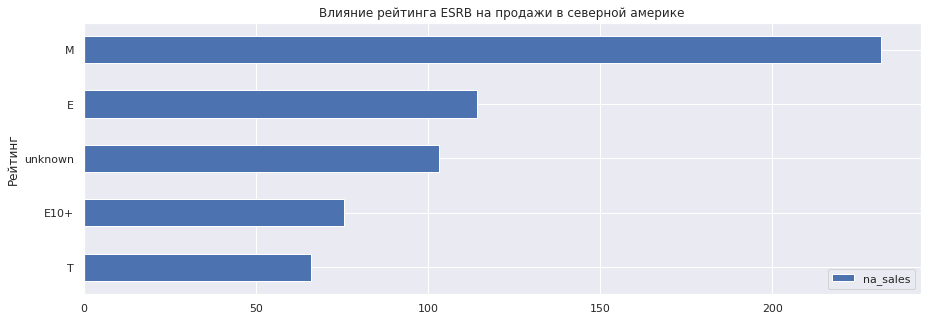

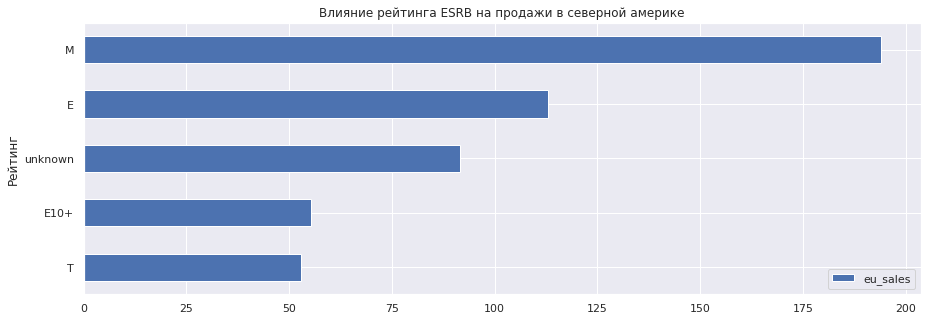

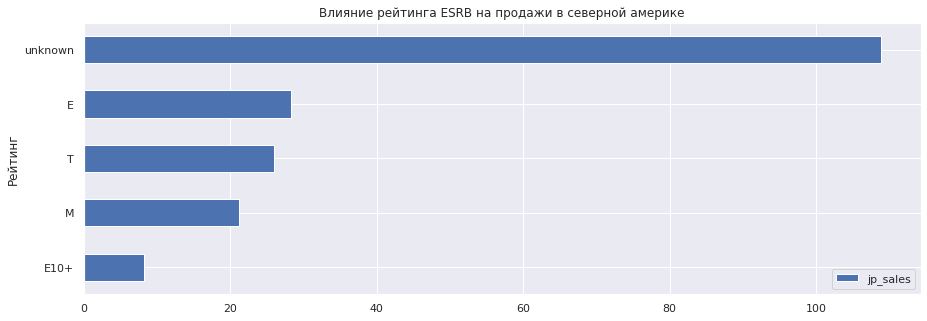

In [61]:
na_rating = (actual_platforms.
      pivot_table(index='rating', values='na_sales', aggfunc='sum').
      sort_values(by='na_sales', ascending=True).plot(kind='barh', 
           title='Влияние рейтинга ESRB на продажи в северной америке', 
           xlabel='Рейтинг', 
           ylabel='Количество продаж')
     )

eu_rating = (actual_platforms.
      pivot_table(index='rating', values='eu_sales', aggfunc='sum').
      sort_values(by='eu_sales', ascending=True).plot(kind='barh', 
           title='Влияние рейтинга ESRB на продажи в северной америке', 
           xlabel='Рейтинг', 
           ylabel='Количество продаж')
     )

jp_rating = (actual_platforms.
      pivot_table(index='rating', values='jp_sales', aggfunc='sum').
      sort_values(by='jp_sales', ascending=True).plot(kind='barh', 
           title='Влияние рейтинга ESRB на продажи в северной америке', 
           xlabel='Рейтинг', 
           ylabel='Количество продаж')
     )


print(na_rating)
print(eu_rating)
print(jp_rating)

Вывод по влиянию рейтинг ESRB на продажи в регионах:  

В америке и европе лидируют игры с рейтингом М, в то время как в японии лидируют игры с неизвестным нам рейтингом ESRB. Также возможно, что в каждом регионе своя собственная система оценки рейтинга.

### Общий вывод по портретам пользователей в зависимости от региона:
1. Самая популярная платформа в америке - X360, в европе - PS4, в японии - 3DS.
2. Список самых популяртных платформ в америке и европе совпадают, в то время как в японии популярными считаются другие платформы. Возможно это связно с тем, что в стране есть большое количество своих региональныъ платформ и пользователи отдают рпедпочтение им.
3. Также как и с популярными платформами в европе и америке предпочтения пользователей в жанрах одинаково.
4. В японии также предпочтения в жанрах отличаются от европы и америки. Связано это скорее всего с культурой или привычками самих японцев в играх.
5. В америке и европе лидируют игры с рейтингом М, в то время как в японии лидируют игры с неизвестным нам рейтингом ESRB.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулировка нулевой и альтернативной гипотез:  
Вопрос "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" полностью совпадает с формулировкой нулевой гипотезы что рейтинги Xbox One и PC равны. Альтернативная гипотеза же ставит вопрос о том, что они не равны.

Выдвинем гипотезы:  
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые  

In [62]:
xbox_one = actual_platforms.query('platform == "XOne" and user_score > 0')
pc = actual_platforms.query('platform == "PC" and user_score > 0')
print('Средний пользовательский рейтинг платформы Xbox One:', xbox_one['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC', pc['user_score'].mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 6.4286407766990274


Предварительный анализ указывает на то, что выборки не равны. Критерий проверки установим на уровне стандарных 5%.

In [63]:
alpha = .05

results = st.ttest_ind(xbox_one['user_score'], pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не получилось отвергнуть, следовательно пользовательские рейтинги платформ XOne и PC при установленом уровне значимости одинаковы.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формулировка нулевой и альтернативной гипотез:  
Вопрос "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" не может быть проверен прямо, потому что нулевая гипотеза всегда должна быть равна, поэтому в данном случае если мы отвергнем нулевую гипотезу, значит подтвердим, что рейтинги разные. Альтернативная гипотеза же ставит вопрос о том, что они не равны.

Выдвинем гипотезы:  
Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые  
Н1: Средние пользовательские рейтинги жанров Action и Sports разные  

In [64]:
action = actual_platforms.query('genre == "Action" and user_score > 0')
sport = actual_platforms.query('genre == "Sports" and user_score > 0')
print('Средний пользовательский рейтинг жанра Action:', action['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports', sport['user_score'].mean())

Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports 5.455897435897437


Предварительный анализ указывает на то, что выборки не равны. Критерий проверки установим на уровне стандарных 5%.

In [65]:
alpha = .05

results = st.ttest_ind(action['user_score'], sport['user_score'], equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза была отвергнута, следовательно пользовательские рейтинги жанров Action и Sports при установленом уровне значимости разные. 

## Общий вывод

В процессе исследования данных о продажах игр, оценки пользователей и экспертов, жанрах и платформах, были отработаны принципы работы с данными по выявлению определяющих успешность игры закономерностях, выполнены следующие этапы и сделаны выводы:
1. Была изучена общая информация о датафрейме:
    * Всего в таблице 16715 строк.
    * Из 11 столбцов в 6 есть пропущенные значения.
    * В названиях всех солбцов имеют нарушение стиля (названия столбцов начинаются с заглавной буквы).
    * Некоторые колонки имеют неверный тип данных.
    * В целом для проведения исследования данных достаточно.
2. Были предобработаны данные:
    * Был изменен формат названия столбцов на строчный.
    * Явных дубликатов не было обнаружено.
    * По итогу обработки пропусков можно сделать следующие выводы:
        * Значние с толбцах name и genre были удалены из-за того что число пропусков слишком мало и никак не повлияют на исследование. Скорее всего это связано с невнимательностью или технической ошибкой при заполнении.
        * В столбцах year_of relese, critic_score и user_score пропуски были заменены нулями, потому что пустые значения в этих столбцах занимали от 40 до 50 процентов данных и их удаление или изменение на средние или медиальные значения слишком сильно повлияет на результаты исследования. В столбце года выхода игры скорее всего пропуски из-за того, что нет данных о точно дате выхода игры. В столбцах с оценкой пользователей и критиков нет значений скорее всего из-за того что пользователи или критики не поставили достаточное окличество оценок играм.
        * В столбце rating все пропуски были изменены на 'unknown', потому что количество пропусков в этом столбце очень велико (40%) из-за чего их удаление или замена на средние или медиальные значения слишком сильно повлияет на результаты исследования. Скорее всего пропуски связаны с тем, что у многих игр нет возрастного ограничения или оно не указано издателем.
        * Также помимо выше указанных причин появляения пропусков возможны ошибки при сборе даных с разных источников.
    * Были изменены типы данных в толбцах year_of release, critic_score и user_Score на более подходящие.
    * Посчитаны суммарные продажи по всем регионам и занесены с отдельный столбец.
3. Провели исследовательский анализ даных:
    * Рост продаж наблюдается в период от 1994 года по 2008 с просадкой в 2003-2004 годах, после 2011 количество продаж падает.
    * Самое большое количество продаж наблюдается в 2008-2009 годах.
    * В среднем платформы актуальны 10 лет, следовательно нам интересны платформы которые были выпущены не больше 4 лет назад.
    * По итогу исследования перспективности платформ нельзя сказать что-то наверняка, потому что на всех платформах наблюдается снижение продаж.
    * Самое большое количество продаж у платформы PS3, самое же низкое у PSP.
    * Потенциально прибыльнимы платформами можно назвать с уверенностью XOne и PS4, потому что они являются самыми новыми из всех представленных в этой таблице платформ. Также нельзя отрицать, что платформа PC будет достаточно прибыльной, потому что продажи на этой платформе наиболее стабильные и компьютер есть почти у каждого, чего нельзя сказать о приставках и портативных приставках.
    * Наименее прибыльными платформами можно считать X360 и PS3, потому что это платформы предыдущего поколения и продажи по ним падают сильнее всего.
    * Диагрммы распределения и корреляция явно указывают на слабую зависимость между отзывами пользователей и количеством продаж игр на платформах, как для всех платформ, так и для отдельно взятых.
    * Диагрммы распределения и корреляция явно указывают на среднюю зависимость между отзывами критиков и количеством продаж игр на платформах, как для всех платформ, так и для отдельно взятых.
    * Самый популярный жанр среди всех игр и имеющий максимальную прибыль за последние 4 года - Action и Shooter, в то время как самый непопулярный - Puzzle.
    * Если смотреть медиальную прибыль среди всех игр самые перспективные можно считать Shooter и Sport. Самый же менее перспективный жанр - Adventure.
4. Был составлен портрет пользователя каждого региона:
    * Самая популярная платформа в америке - X360, в европе - PS4, в японии - 3DS.
    * Список самых популяртных платформ в америке и европе совпадают, в то время как в японии популярными считаются другие платформы. Возможно это связно с тем, что в стране есть большое количество своих региональныъ платформ и пользователи отдают рпедпочтение им.
    * Также как и с популярными платформами в европе и америке предпочтения пользователей в жанрах одинаково.
    * В японии также предпочтения в жанрах отличаются от европы и америки. Связано это скорее всего с культурой или привычками самих японцев в играх.
    * В америке и европе лидируют игры с рейтингом М, в то время как в японии лидируют игры с неизвестным нам рейтингом ESRB.
5. Были проверены гипоетзы:
    * Нулевую гипотезу не получилось отвергнуть, следовательно пользовательские рейтинги платформ XOne и PC при установленом уровне значимости одинаковы.
    * Нулевая гипотеза была отвергнута, следовательно пользовательские рейтинги жанров Action и Sports при установленом уровне значимости разные.